# Install & Import Libraries

In [13]:
# Imports music libraries
import librosa
import librosa.display
import music21

# Import standard Python libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Imports IPython display module for playing audio
import IPython.display as ipd
from IPython.display import Audio

# 
from pydub import AudioSegment

# Audio Player

*Use 'IPython' library to add audio player module directly in Jupyter Notebook. Need to use a '.wav' file as input.*

In [14]:
# Define a function to create a shortened length '.wav' file
def reduce_wav_length(input_file, output_file, target_duration_ms):
    # Load the audio file
    audio = AudioSegment.from_file(input_file, format="wav")
    # Shorten the audio to the target duration
    shortened_audio = audio[:target_duration_ms]
    # Export the shortened audio to a new file
    shortened_audio.export(output_file, format="wav")

In [15]:
# Assign audio file (.wav, .mp3) path to variable 
audio_path_full = 'data/pos.wav'
audio_path_short = 'data/pos_short.wav'

# Assign an output file path and target song duration
output_file_path = "/Users/jordaneisinger/music-genre-classification/data/pos_short.wav"
target_duration_ms = 60000  # Set the target duration in milliseconds (e.g., 60 seconds)

In [16]:
# Call function to create a shorter audio file
reduce_wav_length(audio_path_full, output_file_path, target_duration_ms)

In [17]:
# Create an Audio object
audio_full = Audio(audio_path_full, autoplay=True)
audio_short = Audio(audio_path_short, autoplay=True)

# Displays audio player in notebook (Note: comment out before saving as display drastically increases file size)
# display(audio_full) 
# display(audio_short)

## Generate Sounds using Numpy Arrays

*Test out generating tonal frequencies simply using arrays*

In [18]:
# Can generate sounds using Numpy to create an array with a set framerate and play the audio

# Test 1 (Note: comment out before saving as display drastically increases file size)
framerate = 44100
t = np.linspace(0,1.5,framerate*10)
data = np.sin(3*np.pi*150*t) + np.sin(5*np.pi*224*t)
# display(ipd.Audio(data, rate=framerate))

# Test 2 (Note: comment out before saving as display drastically increases file size)
framerate = 44100
t = np.linspace(0,2.2,framerate*10)
data = np.sin(3*np.pi*150*t) + np.sin(5*np.pi*224*t)
# display(ipd.Audio(data, rate=framerate))

# Tempo (BPM)

In [19]:
# Loads the audio file as a Numpy array (y) as well as the sampling rate (sr)
y, sr = librosa.load(audio_path_short)

# Output of beat tracker is estimate of tempo in beats per minute (BPM) as well as an array of frame numbers for each beat event
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

# Prints the estimated tempo in BPM
print('Estimated tempo: {:.1f} beat per minute'.format(tempo))

Estimated tempo: 136.0 beat per minute


In [20]:
# Converts frame numbers into timings, outputs an array of timestamps in seconds for each beat event
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
beat_times[0:10]

array([0.85913832, 1.30031746, 1.7414966 , 2.18267574, 2.64707483,
       3.11147392, 3.55265306, 3.9938322 , 4.43501134, 4.89941043])

# Key

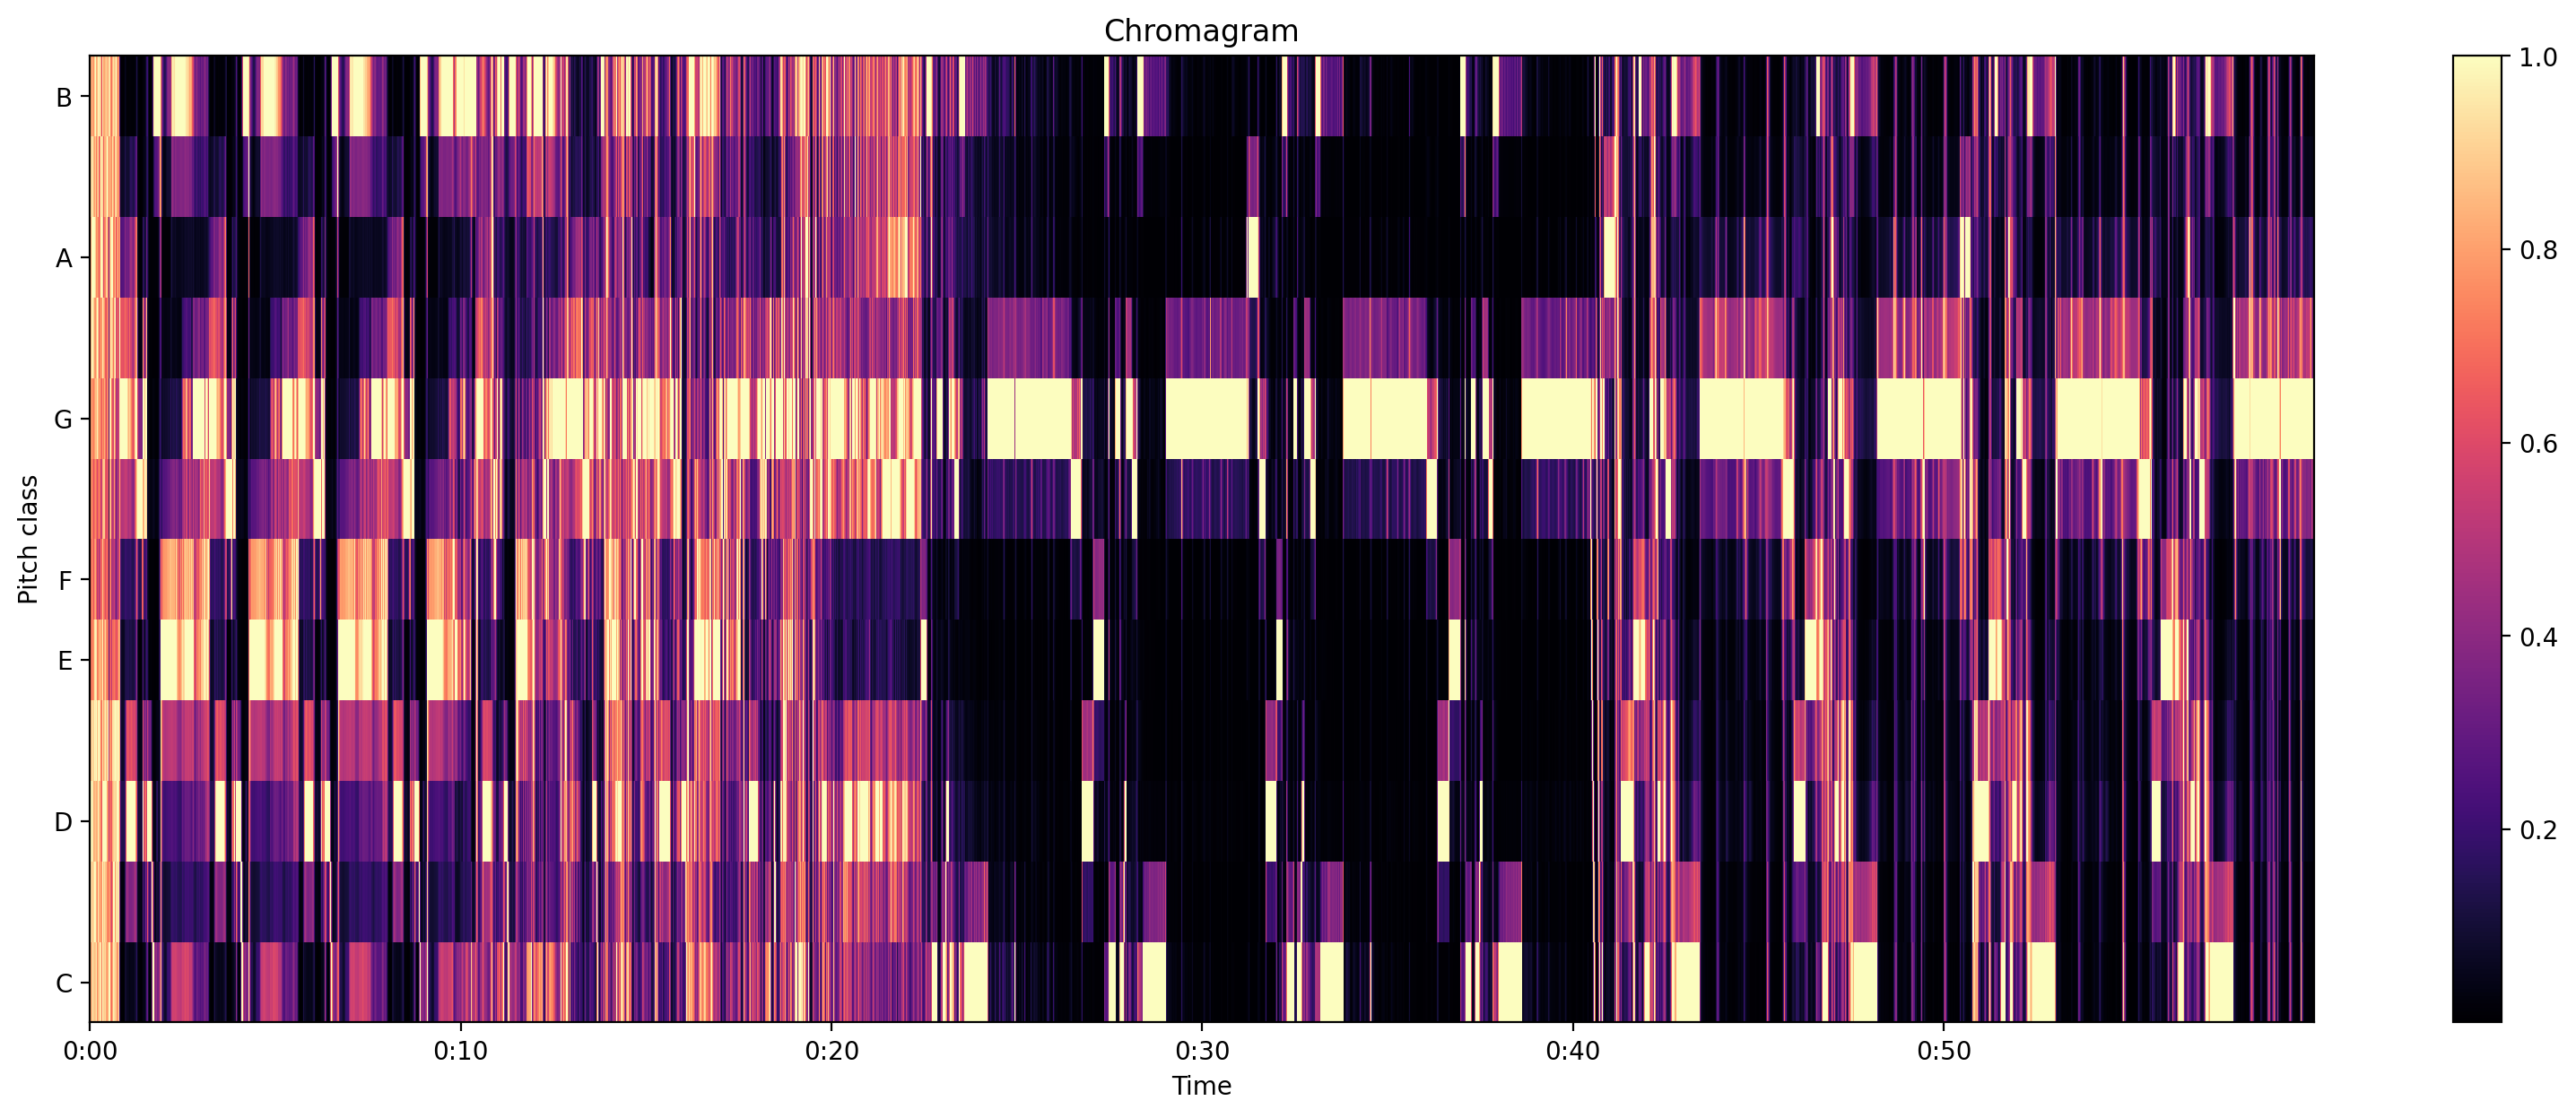

In [21]:
# Loads the audio file as a Numpy array (y) as well as the sampling rate of y (sr)
y, sr = librosa.load(audio_path_short)

# Computes a chromagram from a waveform or power spectrogram. 
chromagram = librosa.feature.chroma_stft(y=y, sr=sr)

# Display the chromagram as a heatmap
plt.figure(figsize=(20, 7))
librosa.display.specshow(chromagram, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.show()

# Visualizing Audio Data

## Waveform
Plots the amplitude envelope of a audio waveform

AttributeError: '_process_plot_var_args' object has no attribute 'prop_cycler'

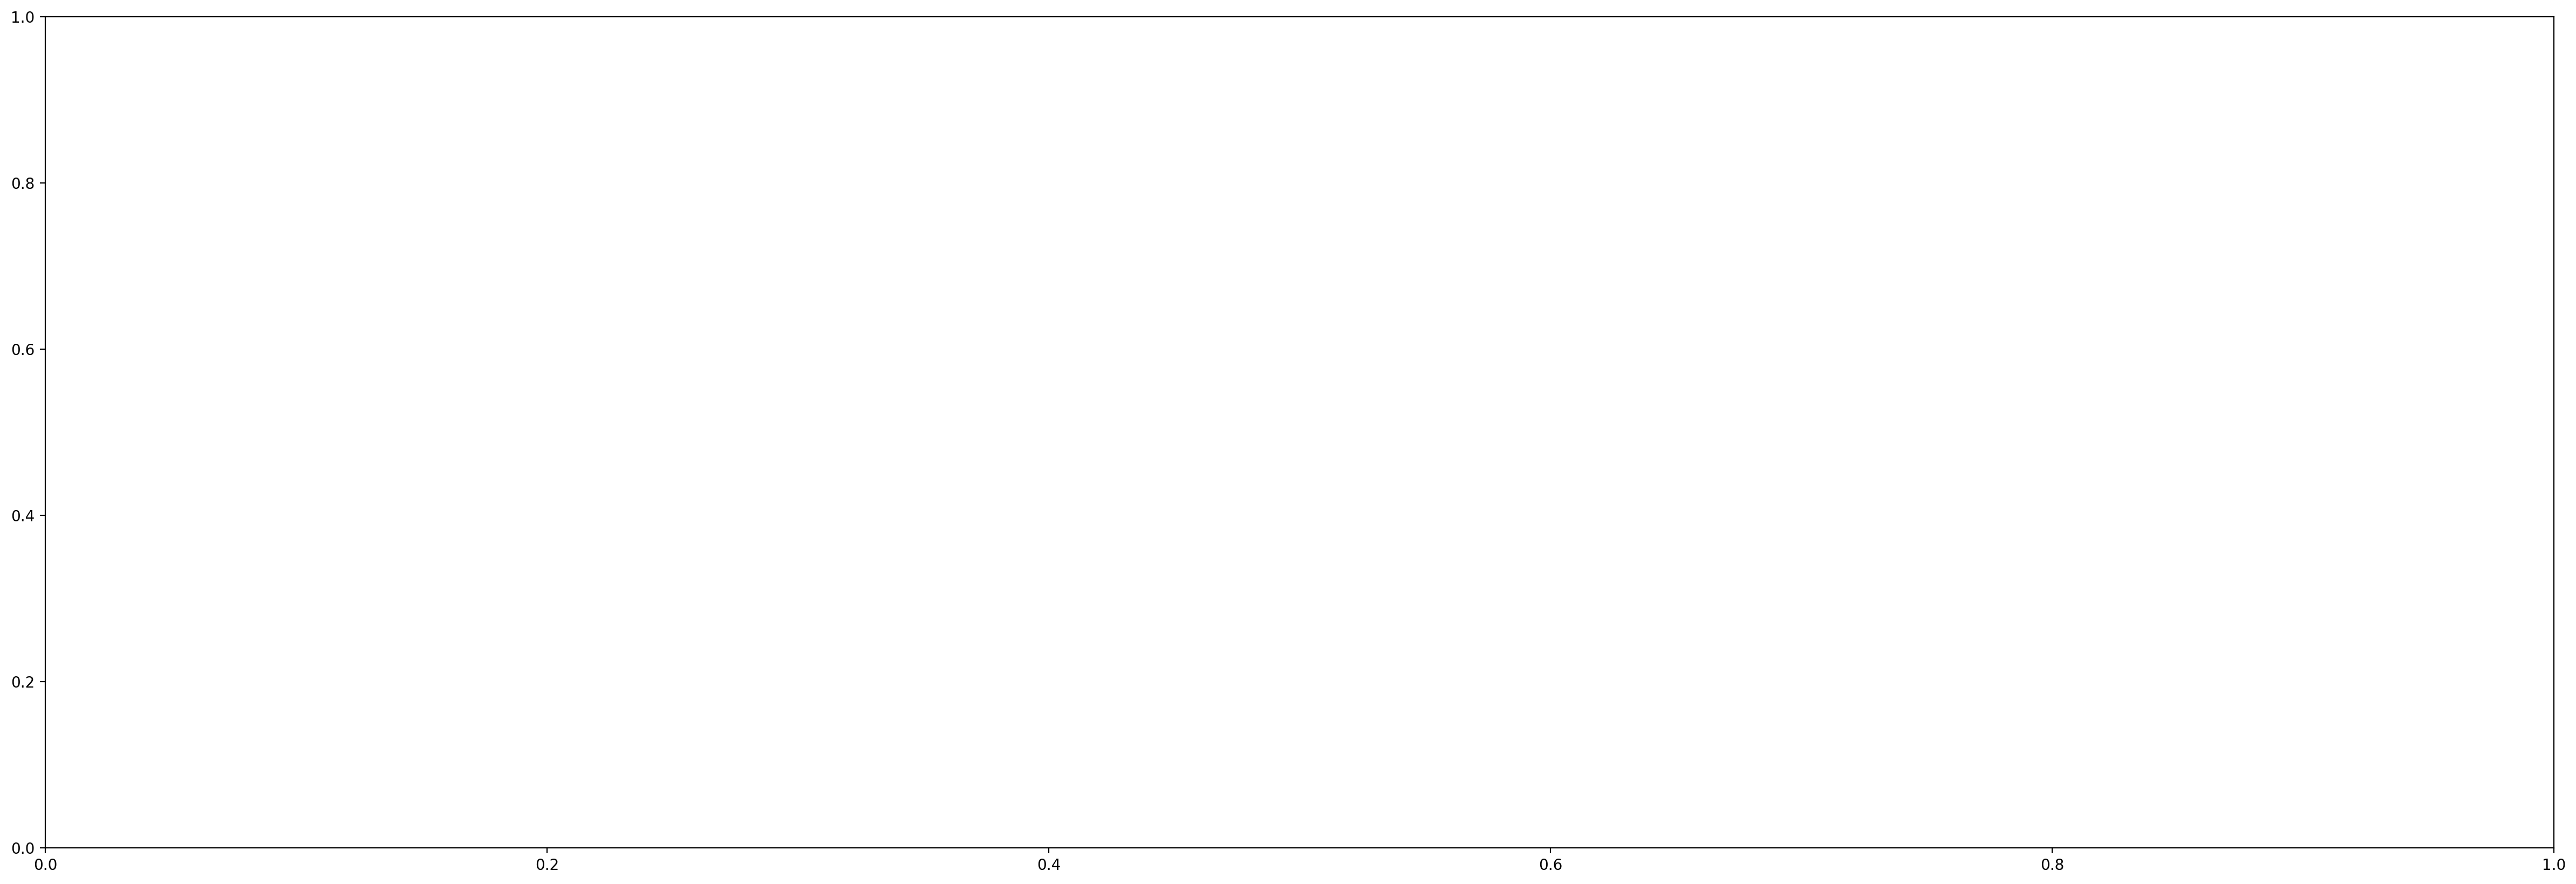

In [25]:
# Sets plot size and displays audio file waveform
plt.figure(figsize=(30, 10))
librosa.display.waveshow(y, sr=sr)

## Spectorgram
Represents the spectrum of frequencies
* *Plot Interpretation*:
  * X-axis: Time of audio clip
  * Y-axis: Range of frequencies (0 to 10kHz)

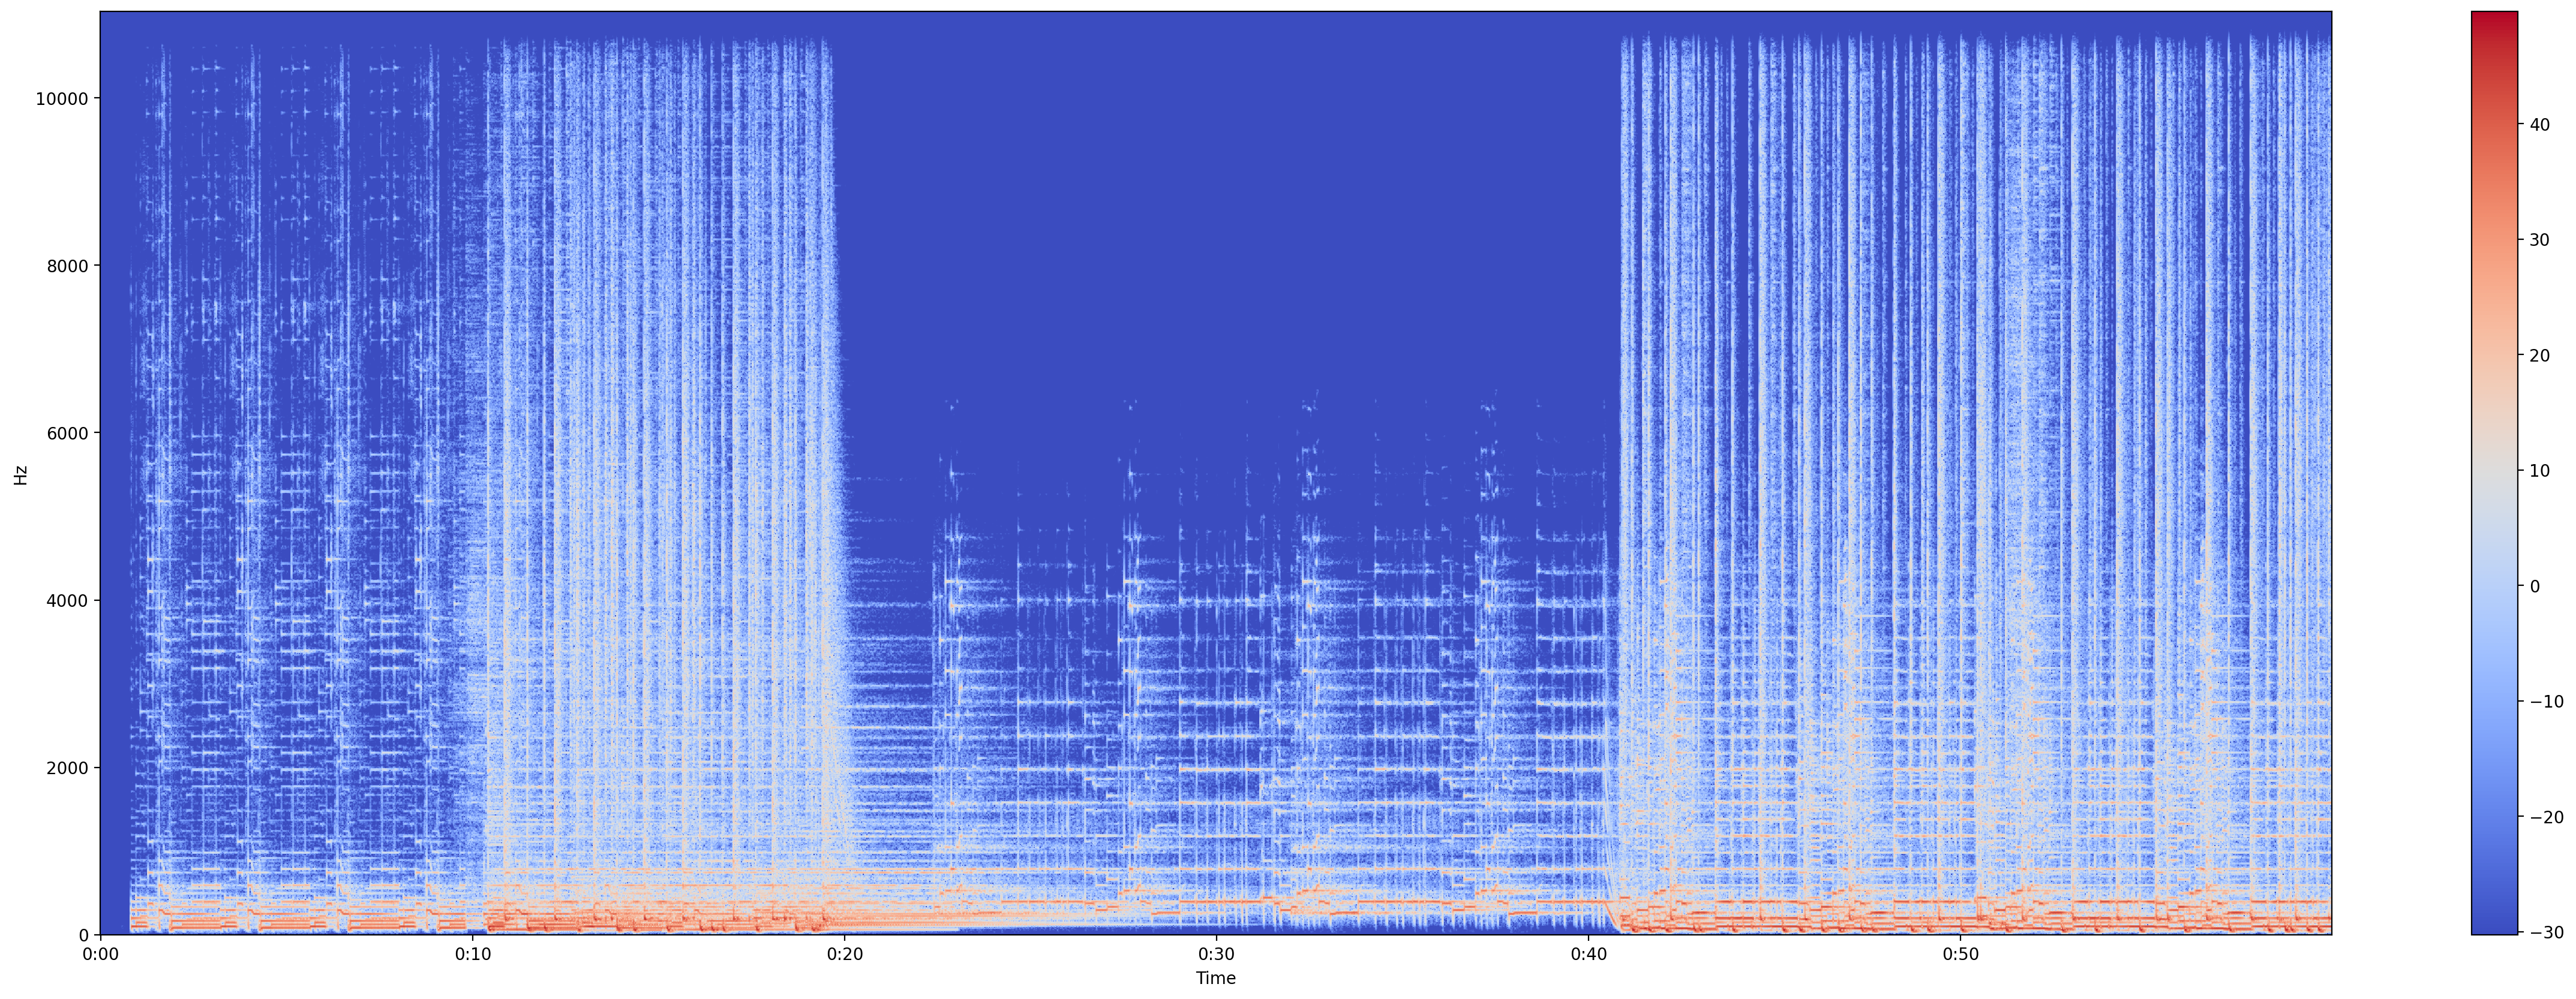

In [23]:
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(30, 10))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

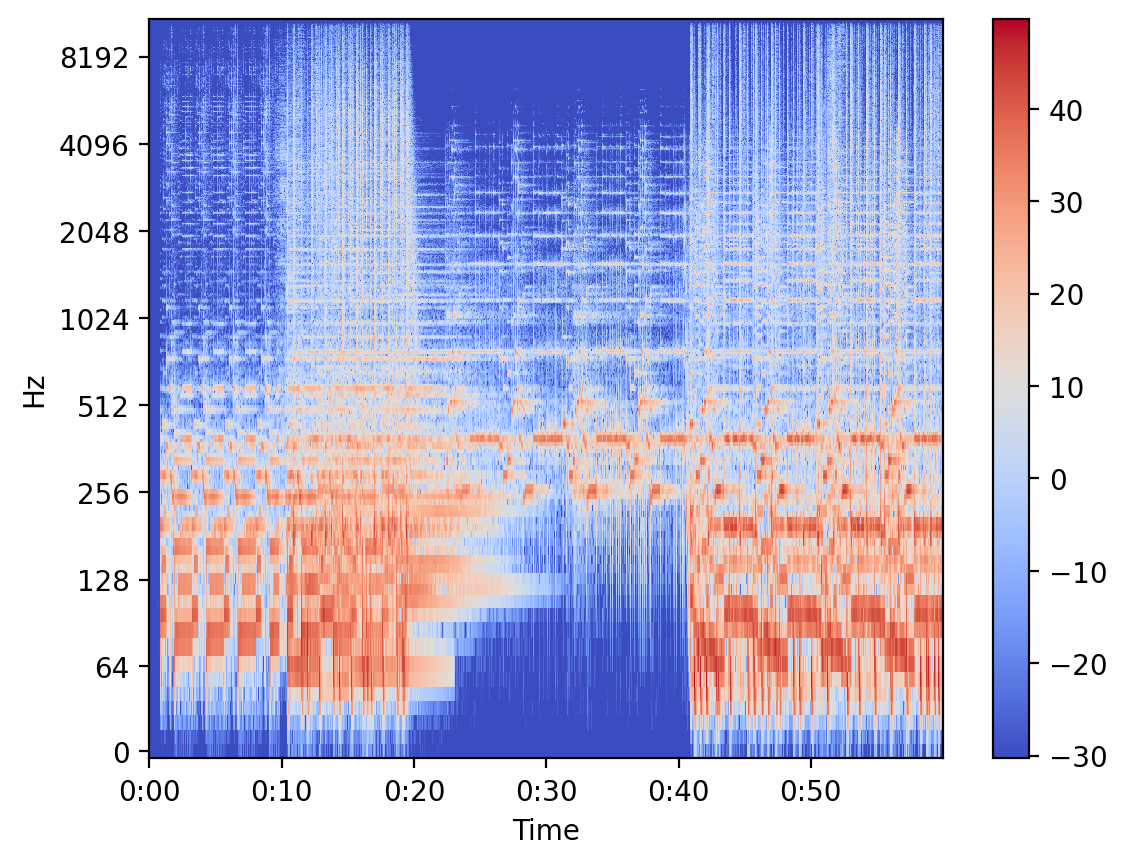

In [24]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()